# Tarea Errores Comunes al Crear Visualizaciones Interactivas

Por: Mariana Castañeda y Shadia Jaafar

### Librerías necesarias

In [66]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from scipy.stats import zscore, t
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingClassifier, StackingClassifier, BaggingClassifier, VotingClassifier

## Punto 1: Datos $CO_2$

Iniciemos cargando los datos y observando qué columnas tenemos:

In [67]:
co = pd.read_csv("https://raw.githubusercontent.com/lihkir/Uninorte/main/AppliedStatisticMS/DataVisualizationRPython/Lectures/Python/PythonDataSets/co2.csv")
co

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0529,0.0637,0.0854,0.154,0.242,0.294,0.412,0.350,0.316,0.299
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.3800,1.2800,1.3000,1.460,1.480,1.560,1.790,1.680,1.730,1.960
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.2200,2.9900,3.1900,3.160,3.420,3.300,3.290,3.460,3.510,3.720
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.3000,6.7500,6.5200,6.430,6.120,6.120,5.870,5.920,5.900,5.830
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.9800,1.1000,1.2000,1.180,1.230,1.240,1.250,1.330,1.250,1.290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,Venezuela,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.1600,6.2200,5.8100,6.360,6.290,6.510,6.000,6.650,6.070,6.030
188,Vietnam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.1600,1.2100,1.2200,1.360,1.470,1.610,1.700,1.570,1.610,1.800
189,Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.9740,1.0100,0.9640,0.999,1.070,0.993,0.811,0.749,0.997,0.865
190,Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.1900,0.1850,0.1520,0.166,0.186,0.194,0.206,0.249,0.261,0.288


Este dataset cuenta con 192 filas y 216 columnas. Además, podemos observar que cuenta con un gran número de datos nulos. Veamos esta proporción con más detalle.

In [68]:
nulos_columna = co.isnull().mean() * 100
print("Proporción de datos nulos por columnas", nulos_columna)
nulos_total = (co.isnull().sum().sum() / co.size) * 100
print("Proporción de datos nulos en total", nulos_total)

Proporción de datos nulos por columnas country     0.000000
1800       97.395833
1801       97.395833
1802       96.354167
1803       97.395833
             ...    
2010        0.520833
2011        0.520833
2012        0.000000
2013        0.000000
2014        0.000000
Length: 216, dtype: float64
Proporción de datos nulos en total 58.774594907407405


Esto indica que el 58.77% de todos los datos del dataset son nulos.

Ahora, realicemos un melt de ese dataframe

In [69]:
co = pd.melt(co, id_vars='country', var_name="year", value_name="co2")
co.head()

,country,year,co2
0,Afghanistan,1800,NaN
1,Albania,1800,NaN
2,Algeria,1800,NaN
3,Andorra,1800,NaN
4,Angola,1800,NaN


Procedemos a cargar el conjunto de datos *gm*

In [70]:
gm = pd.read_csv("https://raw.githubusercontent.com/lihkir/Uninorte/main/AppliedStatisticMS/DataVisualizationRPython/Lectures/Python/PythonDataSets/gapminder.csv")
gm

,Country,Year,fertility,life,population,child_mortality,gdp,region
0,Afghanistan,1964,7.671,33.639,10474903.0,339.7,1182.0,South Asia
1,Afghanistan,1965,7.671,34.152,10697983.0,334.1,1182.0,South Asia
2,Afghanistan,1966,7.671,34.662,10927724.0,328.7,1168.0,South Asia
3,Afghanistan,1967,7.671,35.170,11163656.0,323.3,1173.0,South Asia
4,Afghanistan,1968,7.671,35.674,11411022.0,318.1,1187.0,South Asia
...,...,...,...,...,...,...,...,...
10106,Åland,2002,NaN,81.800,26257.0,NaN,NaN,Europe & Central Asia
10107,Åland,2003,NaN,80.630,26347.0,NaN,NaN,Europe & Central Asia
10108,Åland,2004,NaN,79.880,26530.0,NaN,NaN,Europe & Central Asia
10109,Åland,2005,NaN,80.000,26766.0,NaN,NaN,Europe & Central Asia


Este dataframe cuenta con 10111 filas y 8 variables.

Ahora, debemos realizar un merge entre los dos conjuntos de datos.

In [71]:
merged_df = pd.merge(co, gm, left_index= True, right_index=True, how= 'inner')
merged_df.head()

,country,year,co2,Country,Year,fertility,life,population,child_mortality,gdp,region
0,Afghanistan,1800,NaN,Afghanistan,1964,7.671,33.639,10474903.0,339.7,1182.0,South Asia
1,Albania,1800,NaN,Afghanistan,1965,7.671,34.152,10697983.0,334.1,1182.0,South Asia
2,Algeria,1800,NaN,Afghanistan,1966,7.671,34.662,10927724.0,328.7,1168.0,South Asia
3,Andorra,1800,NaN,Afghanistan,1967,7.671,35.170,11163656.0,323.3,1173.0,South Asia
4,Angola,1800,NaN,Afghanistan,1968,7.671,35.674,11411022.0,318.1,1187.0,South Asia


Escogemos las columnas de interés para realizar los análisis de correlación.

In [72]:
merged_df = merged_df[['country', 'year', 'co2', 'fertility', 'life', 'population']]
merged_df

,country,year,co2,fertility,life,population
0,Afghanistan,1800,NaN,7.671,33.639,10474903.0
1,Albania,1800,NaN,7.671,34.152,10697983.0
2,Algeria,1800,NaN,7.671,34.662,10927724.0
3,Andorra,1800,NaN,7.671,35.170,11163656.0
4,Angola,1800,NaN,7.671,35.674,11411022.0
...,...,...,...,...,...,...
10106,Nicaragua,1852,NaN,NaN,81.800,26257.0
10107,Niger,1852,NaN,NaN,80.630,26347.0
10108,Nigeria,1852,NaN,NaN,79.880,26530.0
10109,North Korea,1852,NaN,NaN,80.000,26766.0


Veamos el diagrama de dispersión entre las emisiones de $CO_2$ y la esperanza de vida a través de los años. En el hover, se encuentra el país y el tamaño de la burbuja depende del nivel de $CO_2$

In [73]:
import plotly.express as px

df_filtered = merged_df.dropna(subset=['co2'])

fig = px.scatter(df_filtered, x='co2', y='life', 
                 animation_frame="year", 
                 size='co2', 
                 color='country', 
                 hover_name='country',
                 size_max=70,
                 title='Relación entre CO2 y esperanza de vida')

fig.show()

En este diagrama de dispersión no se observa una relación lineal entre las variables y una baja correlación. También, vemos que al pasar los años los niveles de $CO_2$ de Estados Unidos y Alemania van en aumento. Mientras que los de Canadá se mantienen constantes. En cuanto a la esperanza de vida, vemos que este índice varía mucho a través del tiempo a pesar de que la concentración de $CO_2$ se mantenga relativamente constante.

Veamos el coeficiente de correlación entre estas variables para comprobar la ausencia de relación lineal.

In [74]:
df_filtered[['co2', 'life']].corr()

,co2,life
co2,1.000000,0.003095
life,0.003095,1.000000


Tal como lo habíamos observado en el diagrama, las variables $CO_2$ y esperanza de vida no tienen correlación lineal entre ellas. 

In [75]:
df_filtered = merged_df.dropna(subset=['fertility', 'co2', 'year'])

fig = px.scatter(df_filtered, x='co2', y='fertility', 
                 animation_frame="year", 
                 color='country', 
                 hover_name='country',
                 title='Relación entre CO2 y la fertilidad')
fig.show()

En este diagrama de dispersión no se observa una relación lineal entre la concentración de $CO_2$ y la fertilidad. Se observa que Estados Unidos es el país que registra los niveles más elevados de $CO_2$ seguido de Alemania. Sin embargo, no es evidente la incidente entre los niveles de este gas con la fertilidad.

Veamos el coeficiente de correlación entre estas variables para corroborar la ausencia de relación lineal.

In [76]:
df_filtered[['co2', 'fertility']].corr()

,co2,fertility
co2,1.000000,0.007139
fertility,0.007139,1.000000


Como lo habíamos observado, no existe correlación lineal entre la concentración de $CO_2$ y la fertilidad.

Analicemos los coeficientes de correlación entre cada par de variables numéricas del dataframe con el fin buscar posibles relaciones lineales entre variables.

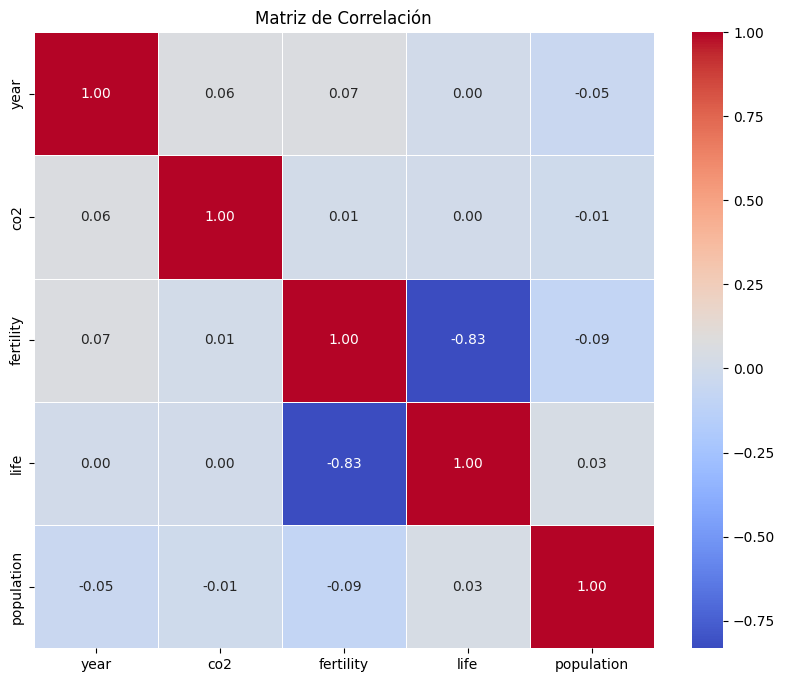

In [77]:
df_num = merged_df.drop(['country'], axis=1)
matriz_corr = df_num.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

Vemos que solo hay un par de variables con una correlación fuerte negativa (fertilidad y esperanza de vida). Observemos su gráfico de dispersión.

In [78]:
df_filtered = merged_df.dropna(subset=['fertility', 'co2', 'year'])

fig = px.scatter(df_filtered, x='fertility', y='life',
                 title='Relación entre la fertilidad y la esperanza de vida')
fig.show()

En este diagrama de dispersión podemos corroborar la fuerte relación lineal inversa que existe entre la fertilidad y la esperanza de vida. Observamos que a medidad de la fertilidad aumenta, la esperanza de vida disminuye.

## Punto 2: Diabetes Dataset

Iniciemos cargando el dataset de Diabetes

In [79]:
df = pd.read_csv("https://raw.githubusercontent.com/lihkir/Data/main/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Este dataset cuenta con 768 filas y 9 columnas.

In [80]:
df.loc[df["Glucose"] == 0.0, "Glucose"] = np.NAN
df.loc[df["BloodPressure"] == 0.0, "BloodPressure"] = np.NAN
df.loc[df["SkinThickness"] == 0.0, "SkinThickness"] = np.NAN
df.loc[df["Insulin"] == 0.0, "Insulin"] = np.NAN
df.loc[df["BMI"] == 0.0, "BMI"] = np.NAN

In [81]:
df.isnull().mean() * 100

Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

## EDA Diabetes

Iniciemos identificando los tipos de variables. 
Respuesta: Outcome
Predictoras: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


Vemos que todas las variables son numéricas.

In [83]:
df['Outcome']

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

Vemos que la variable respuesta es dicotómica. Donde:

**1: Tiene diabetes** \
**0: No tiene diabetes**

Por tanto, tenemos un problema de clasificación

In [84]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- 'Pregnancies' varía de 0 a 17, lo que indica el número de embarazos. En promedio, se tienen 3.84 embarazos con una desviación de 3.36.
- 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', y 'BMI' muestran medidas clínicas con una amplia gama de valores, lo que sugiere diversidad en las condiciones de salud de los individuos.
- La función de pedigrí de diabetes ('DiabetesPedigreeFunction') tiene un promedio de alrededor de 0.47, pero varía significativamente, lo que indica diferencias en los factores de riesgo genético de la diabetes.
- La edad promedio es de aproximadamente 33 años, con una amplia gama de 21 a 81 años.
- 'Outcome' tiene valores de 0 y 1, lo que sugiere que es una variable binaria, probablemente indicando la presencia o ausencia de diabetes.

Identificamos los datos nulos por columnas

<Axes: >

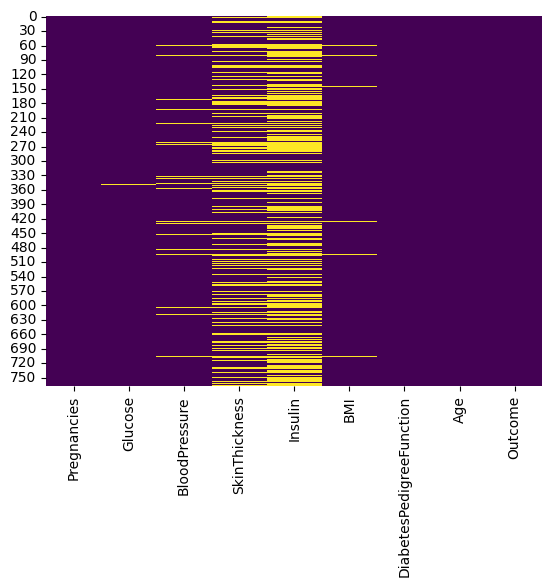

In [85]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

Vemos que la columna con más datos faltantes es Insulin y SkinThickness. Mientras que Preganancies, DiabetesPedigreeFunction, Age y Outcome no tiene datos faltantes.

## Imputación de datos usando las diferentes opciones de estimadores

Iniciemos definiendo las variables explicativas y la variable respuesta

In [86]:
X = df.drop(columns='Outcome')
y = df['Outcome']

Definimos los clasificadores que usaremos

In [87]:
classifiers = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

In [88]:
scoring = 'accuracy'
scores = {}

for clf_name, clf in classifiers.items():
    scores[clf_name] = {}
    for strategy in ('mean', 'median', 'most_frequent'):
        pipe = make_pipeline(SimpleImputer(strategy=strategy), StandardScaler(), clf)
        scores[clf_name][strategy] = cross_val_score(pipe, X, y, scoring=scoring).mean()

    iterative_pipe = make_pipeline(IterativeImputer(random_state=0), StandardScaler(), clf)
    scores[clf_name]['Iterative'] = cross_val_score(iterative_pipe, X, y, scoring=scoring).mean()

Visualizamos los resultados

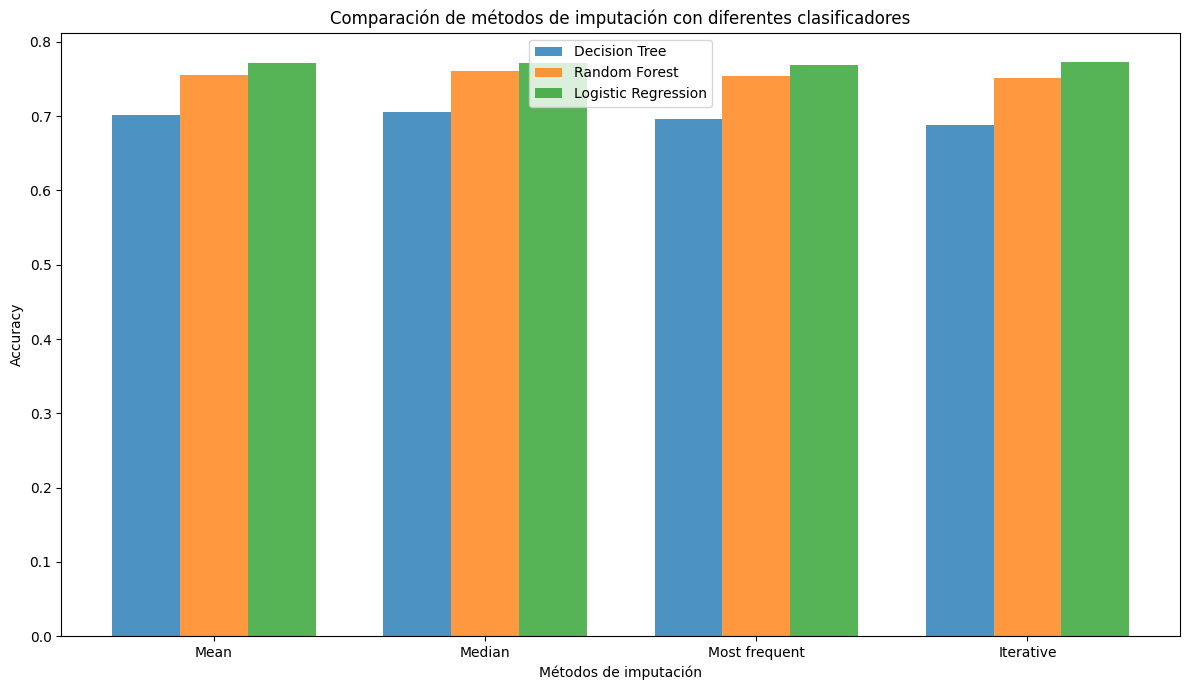

In [89]:
fig, ax = plt.subplots(figsize=(12, 7))
bar_width = 0.25
index = np.arange(len(scores['Logistic Regression']))
opacity = 0.8

for i, (clf_name, clf_scores) in enumerate(scores.items()):
    bar_positions = index + bar_width * i
    ax.bar(bar_positions, list(clf_scores.values()), bar_width, alpha=opacity, label=clf_name)

ax.set_xlabel('Métodos de imputación')
ax.set_ylabel('Accuracy')
ax.set_title('Comparación de métodos de imputación con diferentes clasificadores')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(('Mean', 'Median', 'Most frequent', 'Iterative'))
ax.legend()

plt.tight_layout()
plt.show()

El gráfico muestra que la Regresión Logística consistentemente tiene la precisión más alta en comparación con el Árbol de Decisión y el Random Forest a través de todos los métodos de imputación. El método de imputación iterativa tiene un rendimiento ligeramente inferior para los clasificadores de Árbol de Decisión y Random Forest. Los métodos de imputación media y mediana ofrecen resultados similares entre sí y son los que logran la mejor precisión para el Random Forest y el Árbol de Decisión. En todos los métodos de imputación, la Regresión Logística mantiene una ventaja clara, lo que sugiere que es más robusta a la variación en la imputación de los datos faltantes para este conjunto de datos.

### Estimadores que manejan datos faltantes
Debido a que tenemos un problema de clasificación y teniendo en cuenta la documentación de la librería Scikit-learn, los estimadores para realizar la imputación adecuados son:

- BaggingClassifier

- DecisionTreeClassifier

- HistGradientBoostingClassifier

- RandomForestClassifier

- StackingClassifier

- VotingClassifier

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- Bagging Clasifier

In [91]:
bagging_clf = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=100, 
    random_state=42
)

bagging_clf.fit(X_train, y_train)

y_pred = bagging_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.7597


Observamos que el clasificador Bagging (usando árboles de desición como clasificador base), obtuvo un accuracy del 75%.

- DecisionTreeClassifier


In [92]:
tree = DecisionTreeClassifier(random_state=42)

tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.74


En el caso del modelo de árboles de desición, se obtuvo un score similar al clasificador anterior (74%).

- HistGradientBoostingClassifier

In [93]:
gradient = HistGradientBoostingClassifier(random_state=42)

gradient.fit(X_train, y_train)

y_pred = gradient.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.73


En cuanto al modelo de HistGradientBoostingClassifier se obtuvo un rendimiento ligeramente inferior a los anteriores con un 73%.

- RandomForestClassifier

In [94]:
forest = RandomForestClassifier(random_state=42)

forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.73


Con el modelo de Random Forest se obtuvo el mismo score (73%) que el modelo anterior

- StackingClassifier

In [95]:
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('hgbc', HistGradientBoostingClassifier(random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42))
]

meta_learner = LogisticRegression()

stacking_clf = StackingClassifier(estimators=base_learners, final_estimator=meta_learner)

stacking_clf.fit(X_train, y_train)

y_pred = stacking_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.74


En cuanto a este modelo, se obtiene el mismo score que el modelo de árbol de decisión. A pesar de que este combine varios estimadores, no se ve una mejora significativa en el score de clasificación con respecto a los clasificadores anteriores.

- VotingClassifier

In [96]:
dt_clf = DecisionTreeClassifier(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
hgbc_clf = HistGradientBoostingClassifier(random_state=42)

voting_clf = VotingClassifier(
    estimators=[('dt', dt_clf), ('rf', rf_clf), ('hgbc', hgbc_clf)],
    voting='soft')

voting_clf.fit(X_train, y_train)

y_pred = voting_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.75


Vemos que en general los modelos que soportan los datos faltantes tienen rendimientos similares con este conjunto de datos.

### Identificar datos atípicos para cada variable en el dataset
Test de Rosner, Dixon, Grubbs, Hampel, Percentiles, Boxplots, Histograms, Descriptivos

Iniciemos obervando los boxplots de las variables

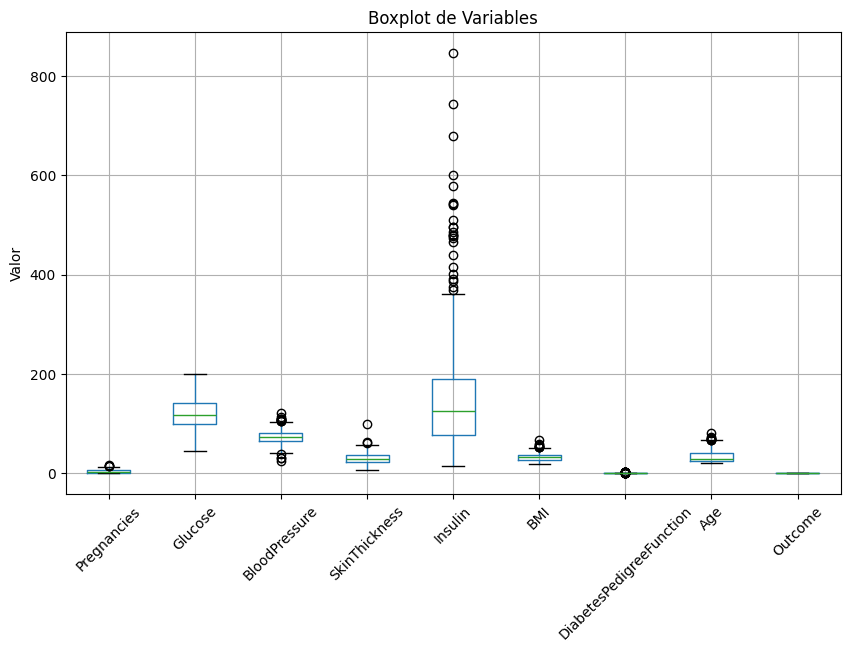

In [97]:
plt.figure(figsize=(10, 6))
df.boxplot()
plt.title('Boxplot de Variables')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.show()

**Pregnancies:** Esta variable tiene una mediana baja y una distribución relativamente simétrica alrededor de la mediana. Hay unos pocos valores atípicos en el extremo superior, lo que indica que hay algunas observaciones con un número de embarazos significativamente mayor que el resto.

**Glucose:** La mediana está cerca del centro del box, lo que sugiere una distribución simétrica. No se presentan datos atípicos.

**BloodPressure:** La mediana parece estar ligeramente sesgada hacia el cuartil inferior, y hay algunos valores atípicos en ambos extremos. Esto sugiere variabilidad en la presión sanguínea, con algunos casos inusualmente altos y bajos.

**SkinThickness:** La variable tiene una mediana baja y algunos datos atípicos en el extremo superior, lo que indica que la mayoría de los valores son bajos, pero algunos individuos tienen medidas de grosor de piel significativamente más altas.

**Insulin:** Esta variable muestra una distribución sesgada  y una gran cantidad de valores atípicos altos. Esto sugiere que mientras la mayoría de las observaciones tienen niveles bajos de insulina, hay un subconjunto significativo con niveles mucho más altos.

**BMI:** El índice de masa corporal tiene una mediana centrada y algunos valores atípicos.

**DiabetesPedigreeFunction:** La mediana está cerca del cuartil inferior y hay varios valores atípicos, lo que sugiere que mientras la mayoría de las observaciones tienen valores bajos para esta función, hay casos que se desvían significativamente de la mediana.

**Age:** La edad tiene una distribución que parece estar sesgada hacia la derecha, con la mediana más cerca del cuartil inferior y algunos valores atípicos en el extremo superior, lo que indica la presencia de individuos significativamente más viejos en comparación con la población general del conjunto de datos.

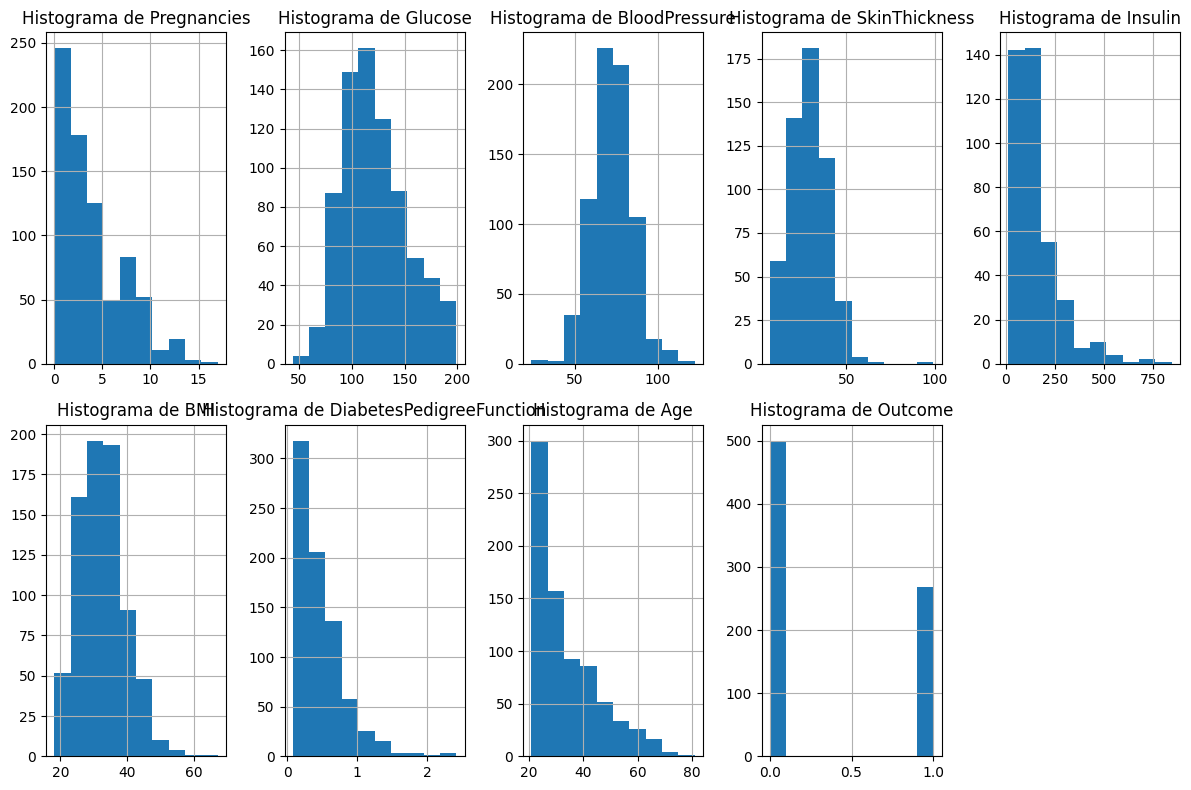

In [98]:
plt.figure(figsize=(12, 8))

# Crear un histograma para cada variable numérica en el DataFrame
for i, column in enumerate(df.columns, start=1):
    plt.subplot(2, (len(df.columns)+1)//2, i) 
    df[column].hist()
    plt.title(f'Histograma de {column}')

plt.tight_layout()
plt.show()

**Pregnancies:** La mayoría de las observaciones caen entre 0 y 5, con una disminución notable en la frecuencia a medida que aumenta el número de embarazos. Esto indica que la mayoría de las personas en este conjunto de datos han estado embarazadas pocas veces. Además, la distribución presenta un fuerte sesgo hacia la derecha.

**Glucose:** La distribución de la glucosa parece ser aproximadamente normal, con la mayoría de las observaciones agrupadas alrededor de un rango medio.

**BloodPressure:** La distribución de la presión sanguínea también parece ser aproximadamente normal, sugiriendo que la mayoría de las personas tienen una presión sanguínea dentro de un rango considerado normal.

**SkinThickness:** El grosor de la piel muestra una distribución con una leve cola hacia la derecha. La mayoría de las mediciones están concentradas en el extremo inferior, pero hay un número significativo de observaciones con mediciones más altas.

**Insuline:** La insulina muestra una distribución con una cola muy larga hacia la derecha, indicando que la mayoría de las personas tienen niveles bajos, pero hay casos con niveles extremadamente altos de insulina.

**BMI:** El índice de masa corporal parece seguir una distribución aproximadamente normal, con la mayoría de las observaciones en el rango de 20 a 40, que abarca desde un peso normal hasta obesidad moderada.

**DiabetesPedigreeFunction:** Esta variable muestra una distribución con una cola hacia la derecha, donde la mayoría de las observaciones tienen valores bajos, pero hay algunos valores muy altos.

**Age:** La edad tiene una distribución que se inclina hacia la izquierda, con un pico en las edades más jóvenes y disminuyendo conforme la edad aumenta.

- **Test de Rosner**
Se basa en la comparación de los residuos estandarizados de los datos con un valor crítico calculado a partir de una distribución t de Student.

**Pasos:**
1. Se calculan los residuos estandarizados para cada observación en el conjunto de datos.

2. Se identifica el residuo estandarizado con el valor absoluto máximo entre todos los residuos estandarizados calculados.

3. Se calcula el estadístico de Rosner dividiendo el valor absoluto máximo del residuo estandarizado por la raíz cuadrada de 1 más el cuadrado de ese mismo residuo estandarizado.

4. Se compara el estadístico de Rosner calculado con un valor crítico obtenido a partir de la distribución t de Student. Este valor crítico depende del tamaño de la muestra y del nivel de significancia seleccionado.

5. Si el valor del estadístico de Rosner es mayor que el valor crítico, se considera que hay al menos un valor atípico en los datos.

In [99]:
def rosner_outliers_df(df, alpha=0.05):
    outliers_dict = {}
    for column in df.columns:
        data = df[column].values
        n = len(data)
        residuals = (data - np.mean(data)) / np.std(data, ddof=1)
        abs_resid_max = np.max(np.abs(residuals))
        critical_value = t.ppf(1 - alpha / (2 * n), n - 2)
        rosner_value = abs_resid_max / np.sqrt(1 + abs_resid_max**2 / (n - 2))
        cond = rosner_value > critical_value
        outliers_indices = np.atleast_1d(cond).nonzero()[0]
        outliers = data[outliers_indices]
        outliers_dict[column] = outliers.tolist()
    return outliers_dict


outliers_dict = rosner_outliers_df(df)
print("Valores atípicos según el test de Rosner:")
for column, outliers in outliers_dict.items():
    print(f"Columna '{column}': {outliers}")


Valores atípicos según el test de Rosner:
Columna 'Pregnancies': []
Columna 'Glucose': []
Columna 'BloodPressure': []
Columna 'SkinThickness': []
Columna 'Insulin': []
Columna 'BMI': []
Columna 'DiabetesPedigreeFunction': [0.627]
Columna 'Age': [50]
Columna 'Outcome': []


Usando este test se identificaron 2 datos atípicos.

- Test de Dixon

Este test compara las diferencias entre el valor más extremo y los valores adyacentes en la muestra para determinar si alguno de estos valores es un valor atípico.

**Pasos:**

1. Se ordenan los datos en orden ascendente o descendente.

2. Se calcula la diferencia entre el valor más extremo y los valores adyacentes en la muestra. Para el extremo inferior, se calcula la diferencia entre el valor más bajo y el segundo valor más bajo. Para el extremo superior, se calcula la diferencia entre el valor más alto y el segundo valor más alto.

3. Se calcula el estadístico Q el cual se define como la diferencia dividida por el rango de la muestra.

4. Se compara el estadístico Q calculado con valores críticos.

5. Si el estadístico Q calculado es mayor que el valor crítico correspondiente, se rechaza la hipótesis nula y se considera que hay un valor atípico en la muestra.

In [100]:
def dixon_test(data, alpha=0.05, side='both'):
    sorted_data = np.sort(data)
    n = len(sorted_data)
    
    Q = (sorted_data[1] - sorted_data[0]) / (sorted_data[-1] - sorted_data[0])
    Q_critical_low = t.ppf(alpha / (2 * n), n - 2)
    if side in ('both', 'low') and Q < Q_critical_low:
        return sorted_data[0]

    Q = (sorted_data[-1] - sorted_data[-2]) / (sorted_data[-1] - sorted_data[0])
    Q_critical_high = t.ppf(1 - alpha / (2 * n), n - 2)
    if side in ('both', 'high') and Q < Q_critical_high:
        return sorted_data[-1]
    
    return None

def dixon_outliers_df(df, alpha=0.05, side='both'):
    outliers_dict = {}
    for column in df.columns:
        data = df[column].values
        outlier = dixon_test(data, alpha, side)
        if outlier is not None:
            outliers_dict[column] = outlier
    return outliers_dict

outliers_dict = dixon_outliers_df(df)
print("Valores atípicos según el test de Dixon:")
for column, outlier in outliers_dict.items():
    print(f"Columna '{column}': {outlier}")


Valores atípicos según el test de Dixon:
Columna 'Pregnancies': 17
Columna 'DiabetesPedigreeFunction': 2.42
Columna 'Age': 81
Columna 'Outcome': 1


Usando este Test se pudieron identificar 3 datos atípicos.

- Test de Grubbs

Este test se basa en la comparación del valor más extremo en la muestra con los demás valores para determinar si este valor es estadísticamente significativamente diferente y, por lo tanto, un posible valor atípico.

1. Se calcula la estadística de Grubbs para el valor más extremo en la muestra.
Fórmula:

\begin{equation*}
G = \frac{|X_i - \bar{X}|}{s}
\end{equation*}

2. Se compara la estadística de Grubbs calculada con el valor crítico correspondiente obtenido de tablas estadísticas o fórmulas específicas según el tamaño de la muestra y el nivel de significancia seleccionado. El valor crítico se calcula bajo la hipótesis nula de que no hay valores atípicos en la muestra.

3. Si el estadístico de Grubbs calculado es mayor que el valor crítico, se rechaza la hipótesis nula y se considera que el valor más extremo en la muestra es un valor atípico.

In [101]:
def grubbs_test(data, alpha=0.05):
    z_scores = zscore(data)
    n = len(data)
    threshold = t.ppf(1 - alpha / (2 * n), n - 2)
    max_z = np.max(np.abs(z_scores))
    
    if max_z > threshold:
        idx = np.argmax(np.abs(z_scores))
        return data[idx]
    
    return None

def grubbs_outliers_df(df, alpha=0.05):
    outliers_dict = {}
    for column in df.columns:
        data = df[column].values
        outlier = grubbs_test(data, alpha)
        if outlier is not None:
            outliers_dict[column] = outlier
    return outliers_dict



outliers_dict = grubbs_outliers_df(df)
print("Valores atípicos según el test de Grubbs:")
for column, outlier in outliers_dict.items():
    print(f"Columna '{column}': {outlier}")


Valores atípicos según el test de Grubbs:
Columna 'DiabetesPedigreeFunction': 2.42
Columna 'Age': 81


Usando este test se volvieron a identificar los mismos datos atípicos que en el test anterior.

- Test de Hampel

Es una técnica robusta utilizada para detectar valores atípicos en una serie de datos univariados. Es menos sensible a datos atípicos y puede manejar mejor la presencia de valores extremos.


1. Se define una ventana móvil de un tamaño especificado. Esta ventana se desliza a lo largo de la serie de datos, tomando una cierta cantidad de puntos de datos en cada paso.

2. Para cada posición de la ventana móvil, se calcula la mediana de los datos dentro de la ventana y la desviación mediana absoluta (MAD) de esos datos. La MAD es una medida robusta de la dispersión de los datos que se calcula utilizando las diferencias absolutas entre los datos y su mediana.

3. Se define un umbral de detección, que es un múltiplo de la MAD calculada en el paso anterior.

4. Para cada punto de datos en la serie, se compara su valor con la mediana de los datos en la ventana móvil correspondiente y se calcula la distancia en unidades de la MAD. Si esta distancia es mayor que el umbral de detección, el punto de datos se identifica como un valor atípico.

In [102]:
def hampel_filter(data, window_size=3, n_sigma=3):
    median = data.rolling(window=window_size, center=True).median()
    deviation = data - median
    sigma = deviation.rolling(window=window_size, center=True).std()
    outliers = np.abs(deviation) > n_sigma * sigma
    return outliers

def hampel_outliers_df(df, window_size=3, n_sigma=3):
    outliers_dict = {}
    for column in df.columns:
        outliers = hampel_filter(df[column], window_size, n_sigma)
        column_outliers = df[column][outliers]
        if not column_outliers.empty:
            outliers_dict[column] = column_outliers
    return outliers_dict

outliers_dict = hampel_outliers_df(df)
print("Valores atípicos según el filtro de Hampel:")
for column, outliers in outliers_dict.items():
    print(f"Columna '{column}': {outliers.tolist()}")



Valores atípicos según el filtro de Hampel:


No se identificaron datos atípicos usando este test.

- Percentiles

Es una técnica que se basa en los percentiles de una distribución para identificar valores que están por encima o por debajo de ciertos umbrales predefinidos.

**Pasos:**

1. Se calculan los percentiles de la distribución de datos. En este caso se escogió el percentil 5 (P5) el cual representa el valor por debajo del cual cae el 5% de los datos, y el percentil 95 (P95) el cual representa el valor por debajo del cual cae el 95% de los datos.

2. Se definen umbrales utilizando los percentiles calculados.

3.  Se identifican los valores que están por debajo del percentil 5 o por encima del percentil 95 como valores atípicos. Estos valores están significativamente por debajo o por encima de la mayoría de los datos y se consideran extremos en relación con la distribución general.

In [103]:
def percentile_outliers_df(df, lower_percentile=5, upper_percentile=95):
    outliers_dict = {}
    for column in df.columns:
        data = df[column]
        lower_threshold = np.percentile(data, lower_percentile)
        upper_threshold = np.percentile(data, upper_percentile)
        column_outliers = data[(data < lower_threshold) | (data > upper_threshold)]
        if not column_outliers.empty:
            outliers_dict[column] = column_outliers
    return outliers_dict

outliers_dict = percentile_outliers_df(df)
print("Valores atípicos según percentiles:")
for column, outliers in outliers_dict.items():
    print(f"Columna '{column}': {outliers.tolist()}")


Valores atípicos según percentiles:
Columna 'Pregnancies': [11, 13, 11, 13, 13, 15, 17, 11, 12, 12, 11, 13, 14, 13, 12, 13, 12, 12, 12, 14, 12, 13, 11, 11, 12, 11, 11, 13, 11, 11, 13, 11, 13, 12]
Columna 'DiabetesPedigreeFunction': [2.288, 0.134, 1.441, 1.39, 1.893, 1.781, 0.14, 0.14, 0.102, 0.13, 1.222, 0.088, 0.096, 1.4, 0.085, 1.189, 0.137, 0.084, 1.321, 0.136, 1.224, 0.101, 2.329, 0.089, 1.318, 1.213, 0.092, 1.353, 0.078, 1.136, 0.128, 1.224, 1.391, 0.129, 0.123, 0.127, 0.122, 1.476, 0.137, 2.137, 1.731, 1.268, 1.6, 0.135, 1.191, 0.108, 1.138, 2.42, 0.126, 1.159, 1.144, 0.107, 1.251, 0.126, 0.121, 0.085, 0.129, 1.154, 1.699, 0.088, 0.1, 1.258, 0.138, 1.282, 1.698, 1.461, 0.115, 0.134, 0.133, 1.162, 1.292, 1.394, 0.127, 0.128, 0.118, 0.121, 1.174, 1.182]
Columna 'Age': [59, 60, 60, 61, 69, 62, 65, 60, 60, 66, 61, 63, 65, 59, 63, 65, 67, 72, 62, 81, 59, 63, 67, 66, 64, 60, 67, 66, 62, 62, 70, 68, 69, 66, 63]


Usando este test se pudieron identificar una mayor cantidad de datos atípicos en las mismas columnas que en los test anteriores (Pregnancies, DiabetesPedigreeFunction y Age). Estos valores encontrados con este test sugieren que estos valores son excepcionales y se desvían notablemente de la mayoría de los datos en las respectivas columnas.

Teniendo en cuenta los resultados de los diferentes tests de detección de valores atípicos, podemos llegar a las siguientes conclusiones:

- La columna 'DiabetesPedigreeFunction' parece ser más propensa a tener valores atípicos, ya que fue identificada como atípica por varios tests (Rosner, Dixon, Grubbs y Percentiles).

- La columna 'Age' también mostró algunos valores atípicos, especialmente el valor 81, que fue identificado como atípico por múltiples tests (Dixon, Grubbs y Percentiles).


###  Imputación de los datos atípicos
Para realizar la imputación de los datos atípicos que identificamos anteriormente, vamos a convertirlos en Nan y luego imputarlos usando IterativeImputer.

In [104]:
df.loc[df['DiabetesPedigreeFunction'] == 2.42, 'DiabetesPedigreeFunction'] = np.nan
df.loc[df['Age'] == 81, 'Age'] = np.nan
df.loc[df['Pregnancies'] == 17, 'Pregnancies'] = np.nan

imputer = IterativeImputer(max_iter=10, random_state=0)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

df_imputed

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.000000,221.074988,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.000000,70.677395,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,21.624783,268.424662,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.000000,168.000000,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.000000,180.000000,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.000000,158.301679,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.000000,112.000000,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,27.811250,175.452360,30.1,0.349,47.0,1.0


Finalmente, observamos el dataframe con los datos atípicos imputados.